# Bootstrap and Jackknife Estimation

In [1]:
suppressPackageStartupMessages({
  library(knitr)
  library(readr)
  library(tidyverse)
  library(car)
  library(caret)
  library(boot)
  library(bootstrap)

})

### Objective

Political dynasties are deep-rooted in the Philippines with nearly 250 political families dominating the politics across the country—at all levels from the brangays to the Senate. In this environment, a well-known surname often translates directly into votes, highlighting the advantage of name recall for successful electoral bids. Dynasties are likewise highly persistent in the entertainment industry. As such,  celebrities  who combine their personal fame and prominent political lineage may significantly boost their electoral prospects.

To better understand the extent and persistence of political dynasties, bootstrap and jackknife resampling methods will be used to quantify the uncertainty around the actors' average number of family in politics, estimating its bias, variance, and a 95% confidence interval.

In [2]:
actors <- read_csv("https://raw.githubusercontent.com/zkdlyn/APM1210_SA2/refs/heads/main/celebrity_sample30.csv",
show_col_types = FALSE)

head(actors,5)

name,years_active,imdb_credits,family,education,politics,wins
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sam Milby,20,60,0,0,0,0
Daniel Padilla,15,34,1,0,0,1
Nadine Lustre,24,47,0,1,0,5
Bea Alonzo,23,51,0,1,0,0
Alden Richards,14,55,0,1,0,0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.5000  0.8667  1.0000  4.0000 

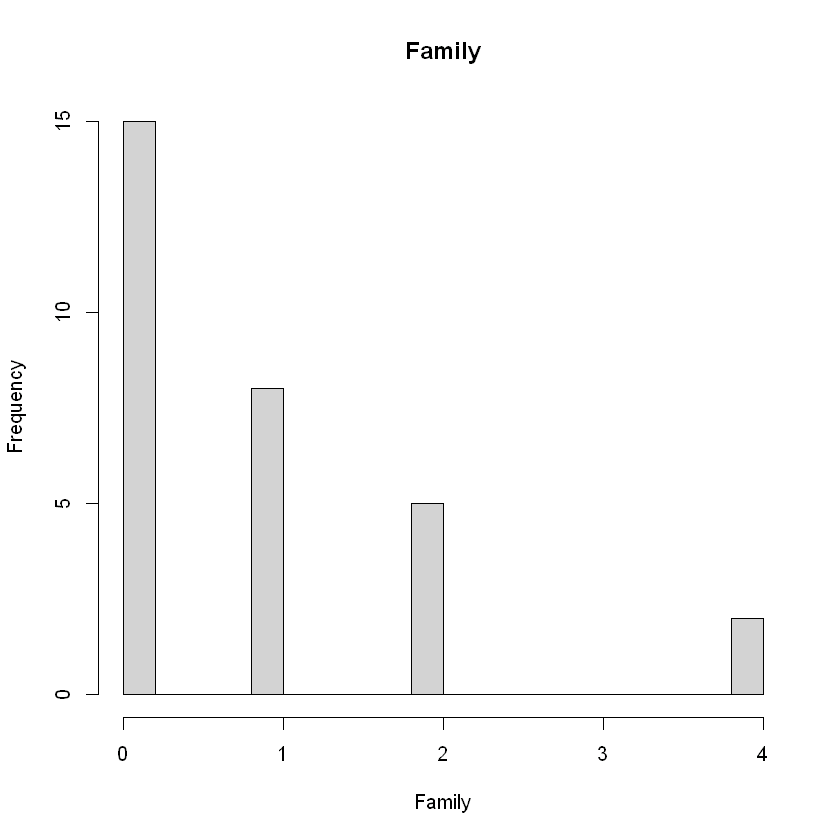

In [3]:
summary(actors$family)
hist(actors$family, breaks = 20, main = "Family", xlab = "Family", ylab = "Frequency")
mean <- mean(actors$family)

### Bootstrap Estimation

In [4]:
set.seed(2025)
B<- 1000
bs_est <- numeric(B)
n<- nrow(actors)
for(b in 1:B) {
    i <- sample(1:n,size= n,replace = TRUE)
    sample <- actors[i,]
    bs_est[b] <- mean(sample$family)
}

mean_boot <- mean(bs_est)
bias_boot <- mean(mean_boot - mean)
se_boot <- sd(bs_est)

summary_bs <- (data.frame(
    Mean = mean,
    Mean_Est = mean_boot,
    Bias = bias_boot,
    SE = se_boot
))


kable(t(summary_bs))



|         |           |
|:--------|----------:|
|Mean     |  0.8666667|
|Mean_Est |  0.8626000|
|Bias     | -0.0040667|
|SE       |  0.2081936|

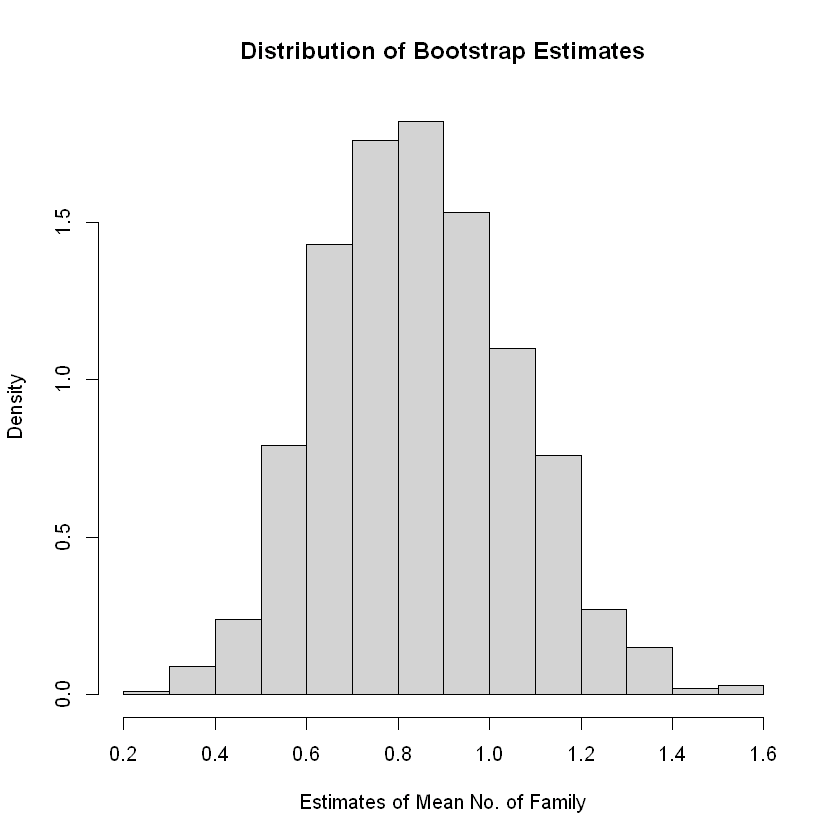

In [5]:
hist(bs_est,prob=TRUE, main= "Distribution of Bootstrap Estimates", xlab="Estimates of Mean No. of Family")

In [6]:
CI <- quantile(bs_est, probs = c(0.025, 0.975))
names(CI) <- c("Lower 95%", "Upper 95%")
CI

Lower 95% Upper 95% 
      0.5       1.3

In the original sample of 30 actors, the mean number of family members in politics is reported to be 0.867. After conducting 1000 bootstrap resamples, the estimated mean is 0.863, with a small negative bias of -0.004 and a standard error of approximately 0.208. This suggests that our sample mean is a reliable estimator with negligible systematic error. The 95 % percentile confidence interval ranges from 0.50 to 1.3, implying that the true average number of immediate family members in politics per actor llikely falls within this interval.

### Jackknife Resampling

In [7]:
n <- nrow(actors)
jk_est <- numeric(n)

for (i in 1:n) {
  sample_jk <- actors[-i, ]
  jk_est[i] <- mean(sample_jk$family)
}

mean_jk <- mean(jk_est)
bias_jk <- (n-1)* (mean_jk - mean)
var_jk <- ((n-1)/n)* mean((jk_est - mean_jk)^2)
se_jk  <- sqrt(var_jk)


summary_jk <- (data.frame(
    Mean = mean,
    Mean_Est = mean_jk,
    Bias = bias_jk,
    SE = se_jk
))

kable(t(summary_jk))



|         |          |
|:--------|---------:|
|Mean     | 0.8666667|
|Mean_Est | 0.8666667|
|Bias     | 0.0000000|
|SE       | 0.0378881|

Based on the jackknife resampling of the data on 30 actors, the estimated mean number of immediate family members in politics is 0.867. This estimate is identical to the sample mean, indicating no detectable bias. The standard error of the mean is approximately 0.038, suggesting that the mean is relatively stable across the samples.

These results reinforce the trend of persistent political family ties among actors. An average of about 0.867 suggests that actors are likely to have at least one immediate family member in politics. The presence of such a phenomenon reflects the blurring lines between politics and the entertainment industry in the Philippines. With name recall being a key factor in electoral success, well-known actors hailing from political clans can make an easy transition to a government seat.